In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
file_path = r'./creditdefault.csv'
data = pd.read_csv(file_path)

data.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [4]:
# 2.Статистический анализ
data.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [5]:
# 3.Проверка на пропуски
data.isnull().sum()

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

<Figure size 1200x800 with 0 Axes>

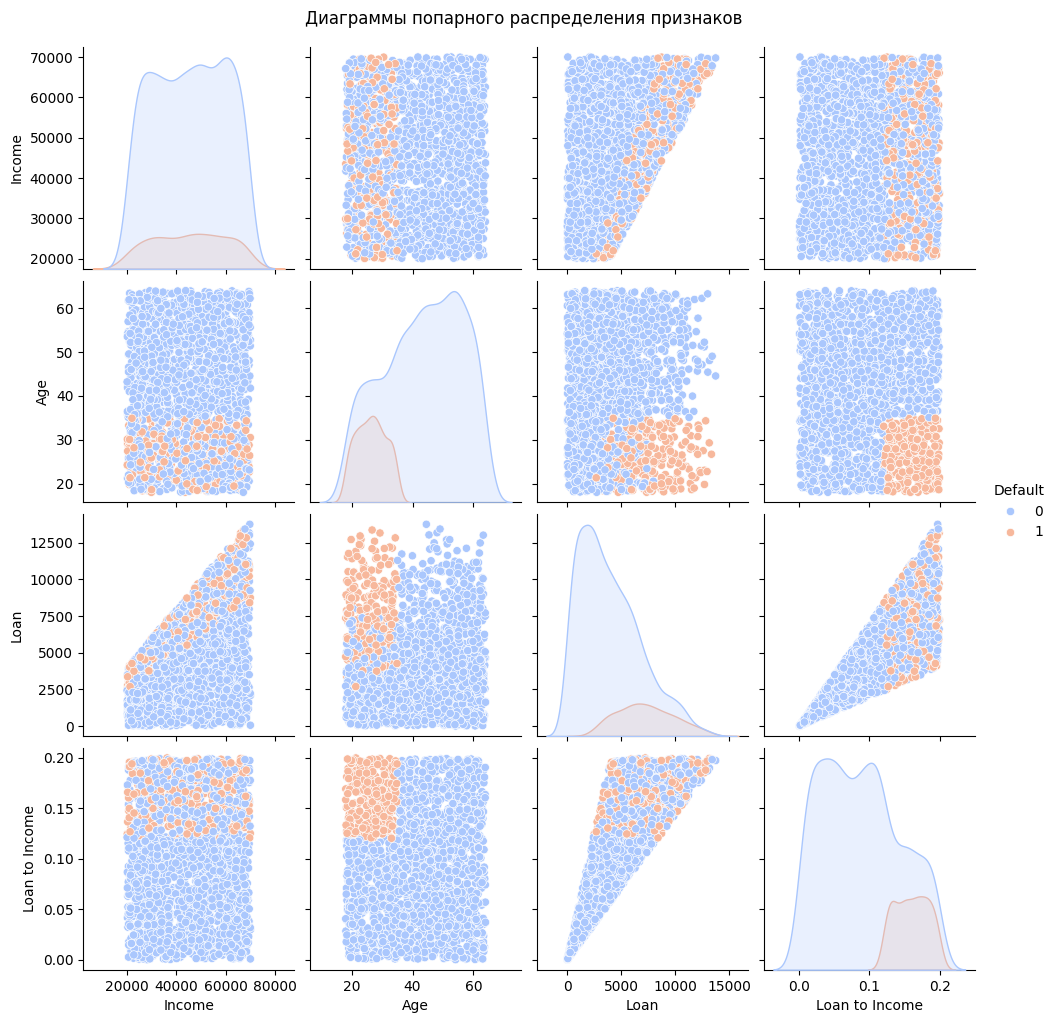

In [6]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue="Default", palette="coolwarm")
plt.suptitle('Диаграммы попарного распределения признаков', y=1.02)
plt.show()

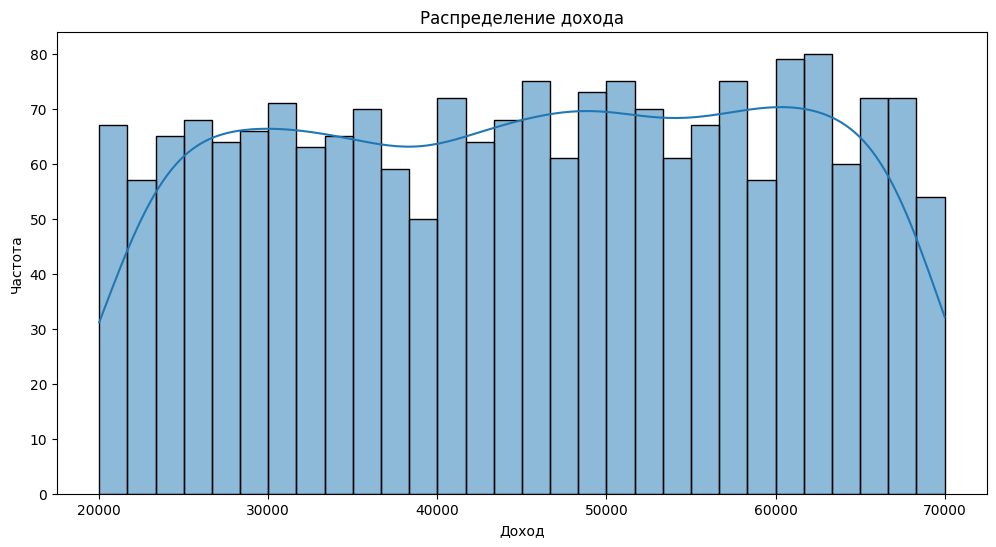

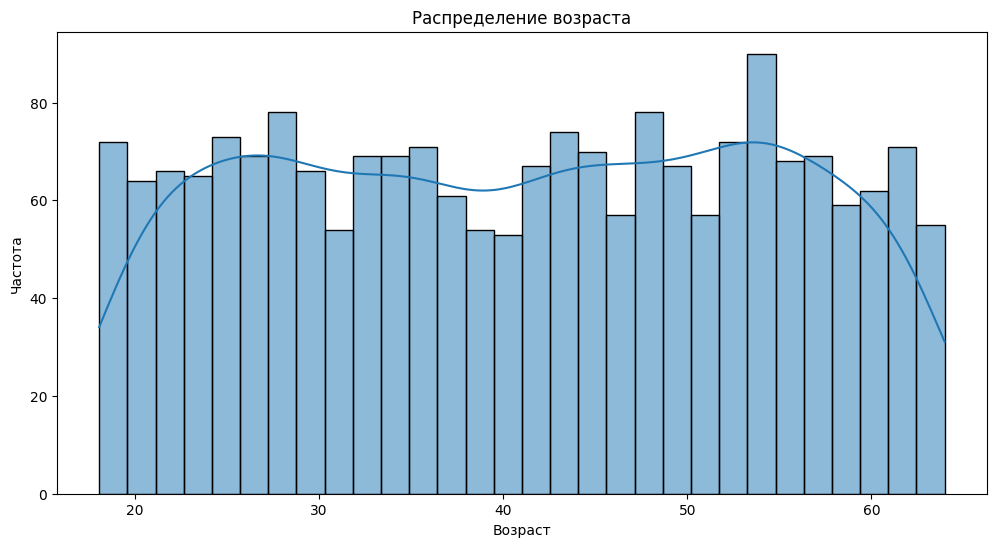

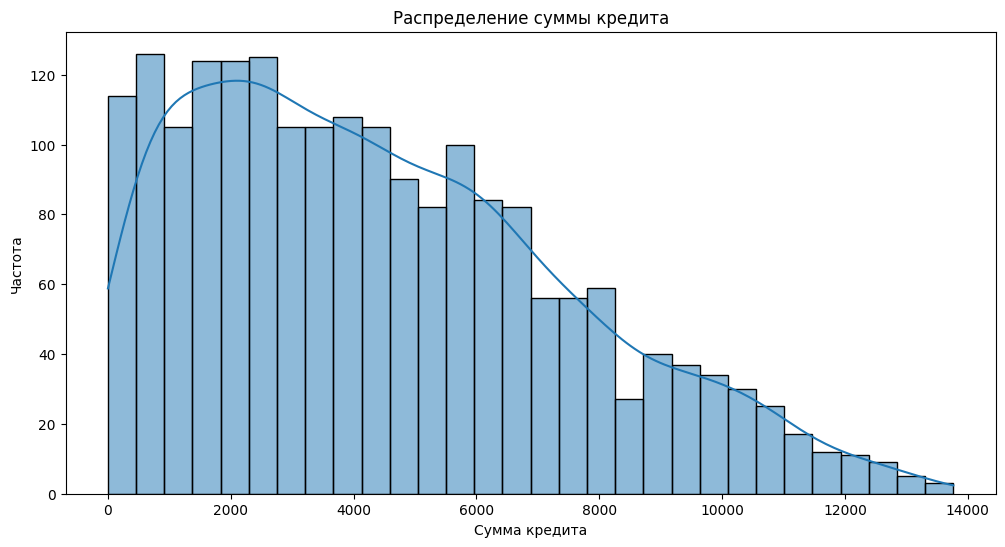

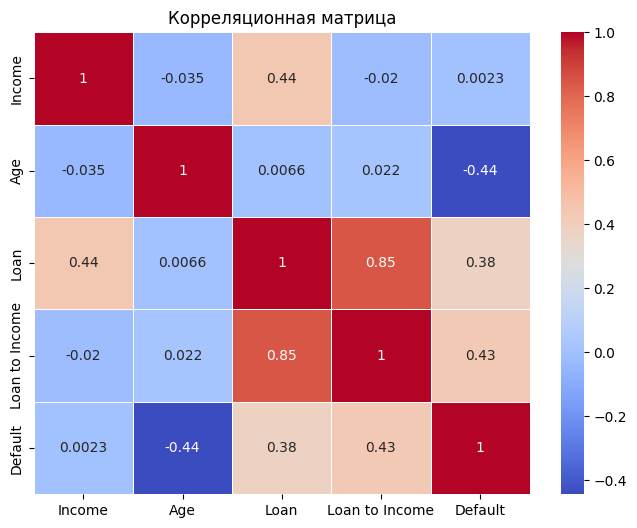

In [7]:
# 1. Распределение дохода (Income)
plt.figure(figsize=(12, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Распределение дохода')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

# 2. Распределение возраста (Age)
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# 3. Распределение суммы кредита (Loan)
plt.figure(figsize=(12, 6))
sns.histplot(data['Loan'], bins=30, kde=True)
plt.title('Распределение суммы кредита')
plt.xlabel('Сумма кредита')
plt.ylabel('Частота')
plt.show()

# 4. Корреляционная матрица
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


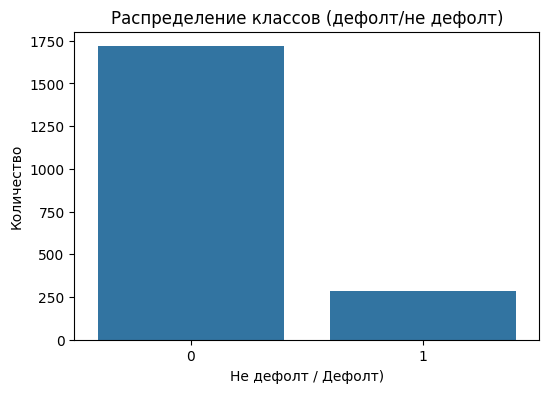

In [8]:
class_counts = data['Default'].value_counts()

# Визуализация распределения классов
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов (дефолт/не дефолт)')
plt.xlabel('Не дефолт / Дефолт)')
plt.ylabel('Количество')
plt.show()

Вот основные выводы и наблюдения, которые можно сделать на основе анализа данных:

1. Корреляция переменных:
Высокая корреляция между переменными Loan и Loan to Income (0.90) подтверждает, что рост суммы кредита ведет к увеличению соотношения кредита к доходу.
Положительная корреляция между доходом и суммой кредита (0.59) ожидаема — клиенты с большими доходами берут более крупные кредиты.
Корреляция между возрастом и кредитом, а также возрастом и доходом почти отсутствует, что указывает на слабую взаимосвязь этих переменных.

2. Возраст клиентов:
Большинство клиентов — в возрасте от 25 до 55 лет, с пиком около 40 лет.
В датасете значительно меньше молодежи (до 30 лет) и пожилых людей (старше 55).

3. Распределение доходов:
Доходы большинства клиентов находятся в диапазоне от 20,000 до 70,000, с пиком около 45,000.
Широкий разброс доходов может влиять на размер доступных кредитов.

4. Распределение суммы кредита:
Средняя сумма кредита составляет около 4,444, причем значительная часть кредитов — до 6,000.
Вероятно, более высокие доходы связаны с большими кредитами, что подтверждается корреляцией.

5. Зависимость вероятности дефолта:
Прямая зависимость между возрастом, доходом и вероятностью дефолта не обнаружена.
Более глубокий анализ (например, регрессия) может прояснить влияние этих факторов. Стоит также исследовать, как соотношение кредита к доходу влияет на вероятность дефолта.

6. Общая структура данных:
Датасет содержит 2000 записей и 5 переменных: доход, возраст, сумма кредита, соотношение кредита к доходу и метка дефолта.
Пропущенных значений нет, что упрощает анализ.

7. Аномалии:
Явных выбросов в данных о доходах и кредитах не выявлено. Однако анализ отдельных случаев с высокими кредитами или низкими доходами может быть полезен.

Итог:
Кредитное поведение клиентов зависит от доходов и сумм кредитов. Для более глубоких выводов стоит изучить дополнительные факторы, например, историю кредитов. Влияние возраста и дохода на вероятность дефолта требует дополнительного анализа.

Accuracy: 0.9417
Confusion Matrix:
[[490  18]
 [ 17  75]]


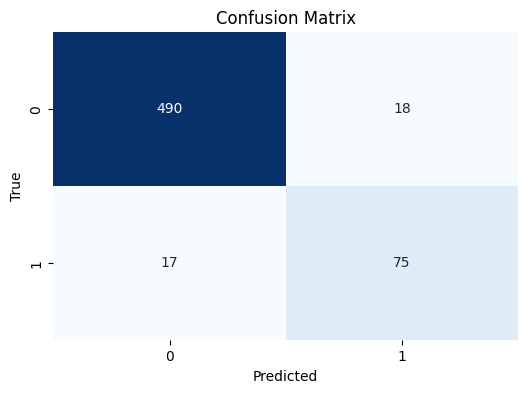

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       508
           1       0.81      0.82      0.81        92

    accuracy                           0.94       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.94      0.94      0.94       600



In [9]:
data = data.dropna() 

X = data[['Income', 'Age', 'Loan']]
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


### Выводы по classification report:
1. **Общая точность модели (Accuracy)**: 
Модель имеет точность 0.94 (94%), что означает, что из 600 предсказаний 94% оказались правильными. Это свидетельствует о высокой общей производительности.

2. **Класс 0**:

   - **Precision (Точность)**: **0.97** — модель в 97% случаев правильно определяет клиентов без дефолта.
   - **Recall (Полнота)**: **0.96** — из всех клиентов без дефолта 96% классифицированы верно.
   - **F1-score**: **0.97** — показатель гармоничного баланса между точностью и полнотой.

3. **Класс 1**:

   - **Precision (Точность)**: **0.81* — *81% предсказаний дефолта верны, однако 19% составляют ложные срабатывания.
   - **Recall (Полнота)**: **0.82** — из всех дефолтных клиентов 82% правильно классифицированы, а 18% упущены.
   - **F1-score**: **0.81** —  модель справляется с определением дефолта, но менее эффективно, чем с "не дефолтом".

4. **Средние значения**:

   - **Macro avg (Среднее арифметическое)**: **0.89** — усредненный показатель между классами, без учета их численности.
   - **Weighted avg (Взвешенное среднее)**: **0.94** — взвешенное среднее, отражающее превосходную работу модели с более многочисленным классом "не дефолт".

### Дополнительные выводы:
- Модель лучше справляется с предсказанием класса "не дефолт" (точность и полнота около 97%), чем класса "дефолт" (81-82%).
- Несмотря на общую высокую точность, модель может ошибочно классифицировать 18% дефолтных клиентов как "не дефолт", что важно учитывать в практическом применении, особенно в финансовой сфере.
